In [1]:
import cv2
import numpy as np

# Capture the video from a webcam (or replace with a video file path)
cap = cv2.VideoCapture(0)

# Take the first frame and convert it to grayscale
ret, frame1 = cap.read()
prvs = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

# Define the codec and create VideoWriter object to save the video
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('motion_output.avi', fourcc, 20.0, (640, 480))

# Loop until the end of the video
while cap.isOpened():
    ret, frame2 = cap.read()
    
    if not ret:
        break
    
    # Convert the next frame to grayscale
    next_frame = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    # Calculate dense optical flow using the Farneback method
    flow = cv2.calcOpticalFlowFarneback(prvs, next_frame, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    
    # Compute the magnitude and angle of the 2D flow vectors
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    
    # Use the angle to generate the hue (for visualization)
    hsv = np.zeros_like(frame1)
    hsv[..., 1] = 255
    hsv[..., 0] = ang * 180 / np.pi / 2
    hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)

    # Convert HSV to BGR for displaying the dense optical flow visualization
    bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    # Show the result
    cv2.imshow('Dense Optical Flow', bgr)
    
    # Save the output video
    out.write(bgr)

    # Update the previous frame
    prvs = next_frame.copy()

    # Exit if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and writer objects
cap.release()
out.release()

# Close all windows
cv2.destroyAllWindows()


# INPUT VIDEO

In [2]:
import cv2
import numpy as np

# Capture the video from a file
video_path = 'Messi.mp4'  # Provide the path to your video file
cap = cv2.VideoCapture(video_path)

# Take the first frame and convert it to grayscale
ret, frame1 = cap.read()
prvs = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

# Define the codec and create VideoWriter object to save the video
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('motion_output.avi', fourcc, 20.0, (frame1.shape[1], frame1.shape[0]))

# Loop until the end of the video
while cap.isOpened():
    ret, frame2 = cap.read()
    if not ret:
        break
    
    # Convert the next frame to grayscale
    next_frame = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    # Calculate dense optical flow using the Farneback method
    flow = cv2.calcOpticalFlowFarneback(prvs, next_frame, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    
    # Compute the magnitude and angle of the 2D flow vectors
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    
    # Use the angle to generate the hue (for visualization)
    hsv = np.zeros_like(frame1)
    hsv[..., 1] = 255
    hsv[..., 0] = ang * 180 / np.pi / 2
    hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)

    # Convert HSV to BGR for displaying the dense optical flow visualization
    bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    # Show the result
    cv2.imshow('Dense Optical Flow', bgr)
    
    # Save the output video
    out.write(bgr)

    # Update the previous frame
    prvs = next_frame.copy()

    # Exit if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and writer objects
cap.release()
out.release()

# Close all windows
cv2.destroyAllWindows()


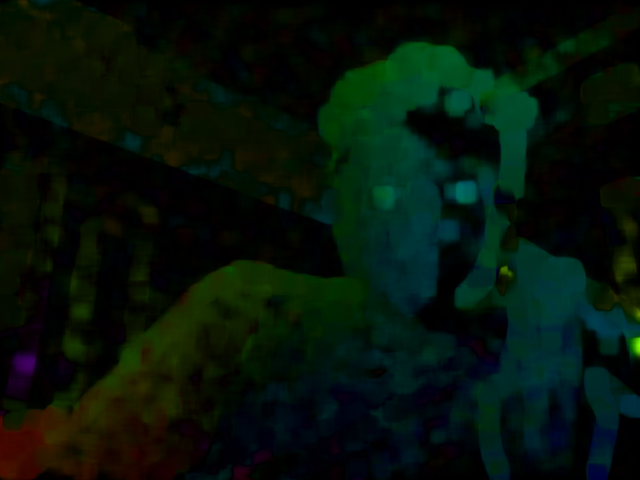

In [ ]:
# Import necessary libraries
import cv2
import numpy as np
from IPython.display import display, Image, clear_output
import time

# Capture the video from a webcam
cap = cv2.VideoCapture(0)

# Take the first frame and convert it to grayscale
ret, frame1 = cap.read()
prvs = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

# Loop until interrupted or until video ends
try:
    while cap.isOpened():
        ret, frame2 = cap.read()

        if not ret:
            break

        # Convert the next frame to grayscale
        next_frame = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

        # Calculate dense optical flow using the Farneback method
        flow = cv2.calcOpticalFlowFarneback(prvs, next_frame, None, 0.5, 3, 15, 3, 5, 1.2, 0)

        # Compute the magnitude and angle of the 2D flow vectors
        mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])

        # Use the angle to generate the hue (for visualization)
        hsv = np.zeros_like(frame1)
        hsv[..., 1] = 255
        hsv[..., 0] = ang * 180 / np.pi / 2
        hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)

        # Convert HSV to BGR for displaying the dense optical flow visualization
        bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

        # Display the result in the notebook
        _, img_encoded = cv2.imencode('.png', bgr)
        display(Image(data=img_encoded))
        clear_output(wait=True)

        # Update the previous frame
        prvs = next_frame.copy()

        # Control frame rate
        time.sleep(0.03)

except KeyboardInterrupt:
    print("Motion detection interrupted.")

# Release the video capture object
cap.release()

# Close all windows (though they aren't created here)
cv2.destroyAllWindows()
